# Exploratory Data Analysis Part II

The next part of our EDA we will analyze the dataset that includes the spotify audio feature data. The purpose of this analysis is to explore the what audio features lead to song popularity. 

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import dataset
df = pd.read_csv('User_SongFeatures_data.csv')

In [48]:
len(df)

1142730

In [49]:
df.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'song', 'id', 'name', 'uri_x', 'acousticness', 'analysis_url',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri_y', 'valence'],
      dtype='object')

In [50]:
#get rid of unecessary columns
features_df = df.drop(columns = ['user_id','track_href', 'type', 'uri_y', 'name', 'uri_x', 'id', 'analysis_url'])


In [59]:
# add total listen count of each song

total_listen_count = features_df.groupby('song').sum()[['listen_count']]
listen_df = features_df.merge(total_listen_count, on='song').drop(columns=['listen_count_x']).drop_duplicates('song')

In [60]:
listen_df.song_id.nunique()

5729

In [61]:
listen_df.head()

,song_id,title,release,artist_name,year,song,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,listen_count_y
0,SOBXHDL12A81C204C0,stronger,Graduation,kanye west,2007,Stronger - Kanye West,0.005640,0.617,311867,0.717,0.000000,10,0.408,-7.858,0,0.1530,103.992,4,0.490,4846
1365,SOBYHAJ12A6701BF1D,constellations,In Between Dreams,jack johnson,2005,Constellations - Jack Johnson,0.470000,0.719,201653,0.299,0.000034,1,0.111,-12.465,1,0.0383,122.025,4,0.446,1287
1922,SODACBL12A8C13C273,learn to fly,There Is Nothing Left To Lose,foo fighters,1999,Learn To Fly - Foo Fighters,0.000018,0.465,235293,0.919,0.000021,4,0.262,-4.025,1,0.0408,135.997,4,0.537,2445
2839,SODXRTY12AB0180F3B,paper gangsta,The Fame Monster,lady gaga,2008,Paper Gangsta - Lady GaGa,0.050300,0.755,263360,0.839,0.000000,1,0.250,-4.985,1,0.0849,98.973,4,0.530,1198
3366,SOFGUAY12AB017B0A8,stacked actors,There Is Nothing Left To Lose,foo fighters,1999,Stacked Actors - Foo Fighters,0.002030,0.502,256440,0.934,0.001020,7,0.234,-5.145,1,0.0500,134.898,4,0.670,267


In [64]:
# popularity of songs in different years 

print(listen_df[listen_df.year != 0].year.min()) # there are years inputted as 0
print(listen_df.year.max())

1955
2010


In [72]:
# aggregate by year 

year_count = listen_df[listen_df.year != 0].groupby('year').sum()[['listen_count_y']].reset_index()

In [74]:
# create buckets for year
year_count['decade'] = (year_count.year//10)*10

In [84]:
year_count.head()

,year,listen_count_y,decade
0,1955,282,1950
1,1956,468,1950
2,1957,474,1950
3,1958,3257,1950
4,1959,1118,1950


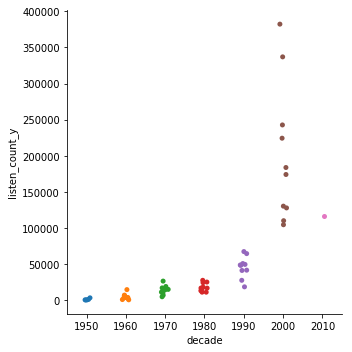

In [82]:
sns.catplot(x="decade", y="listen_count_y", data=year_count)


In [80]:
# group by decade and graph

decade_count = year_count.groupby('decade').sum()[['listen_count_y']].reset_index()



,decade,listen_count_y
0,1950,5599
1,1960,45277
2,1970,138420
3,1980,179546
4,1990,457777
5,2000,2016274
6,2010,116405


Makes sense that current songs are more popular. 2010's dont have higher listen count than 2000's because data stops at 2012.

In [85]:
# next look at danceability and valence

In [86]:
dance_count = listen_df.groupby('danceability').sum()[['listen_count_y']].reset_index()

In [87]:
dance_count.head()

,danceability,listen_count_y
0,0.0605,730
1,0.0627,118
2,0.0645,476
3,0.0703,156
4,0.0724,84


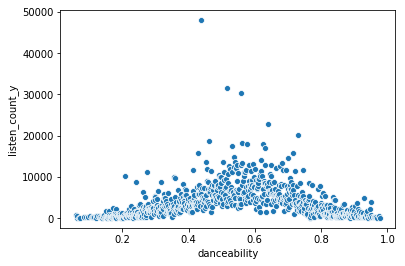

In [89]:
sns.scatterplot(x="danceability", y="listen_count_y", data=dance_count)

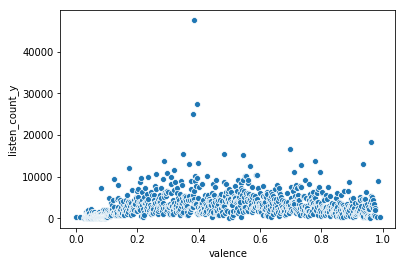

In [90]:
valence_count = listen_df.groupby('valence').sum()[['listen_count_y']].reset_index()
sns.scatterplot(x="valence", y="listen_count_y", data=valence_count)

In [103]:
# instead get most popular songs and look at danceability and valence of those since distribution of songs with certain valence not equal distribution
top_songs = listen_df.sort_values(by='listen_count_y',ascending=False).head(50)
print(top_songs.head())

                   song_id     title                 release    artist_name  \
37184   SOSXLTC12AF72A7F54   revelry       Only By The Night  kings of leon   
31343   SONYKOW12AB01849C9   secrets               Waking Up    onerepublic   
531582  SOUFTBI12AB0183F65   invalid           Fermi Paradox       tub ring   
330188  SOFLJQZ12A6D4FADA6  tive sim        Nova Bis-Cartola        cartola   
43329   SOTWNDJ12A8C143984  marry me  Save Me_ San Francisco          train   

        year                     song  acousticness  danceability  \
37184   2008  Revelry - Kings Of Leon       0.19600         0.437   
31343   2009    Secrets - OneRepublic       0.09800         0.515   
531582  2002       Invalid - Tub Ring       0.00255         0.558   
330188  1974       Tive Sim - Cartola       0.42000         0.731   
43329   2009         Marry Me - Train       0.83400         0.461   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
37184        201733   0.748   

(array([ 4.,  1.,  2.,  6., 12., 11.,  6.,  6.,  1.,  1.]),
 array([0.209, 0.281, 0.353, 0.425, 0.497, 0.569, 0.641, 0.713, 0.785,
        0.857, 0.929]),
 <a list of 10 Patch objects>)

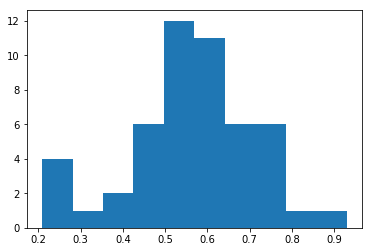

In [104]:
plt.hist(top_songs.danceability)

(array([ 3.,  6., 10.,  8.,  5.,  7.,  4.,  4.,  0.,  3.]),
 array([0.0827 , 0.17283, 0.26296, 0.35309, 0.44322, 0.53335, 0.62348,
        0.71361, 0.80374, 0.89387, 0.984  ]),
 <a list of 10 Patch objects>)

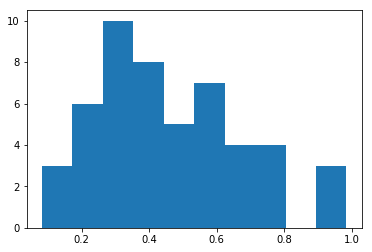

In [105]:
plt.hist(top_songs.valence)

(array([ 2.,  0.,  4.,  3.,  5.,  5., 13.,  5.,  5.,  8.]),
 array([0.267 , 0.3391, 0.4112, 0.4833, 0.5554, 0.6275, 0.6996, 0.7717,
        0.8438, 0.9159, 0.988 ]),
 <a list of 10 Patch objects>)

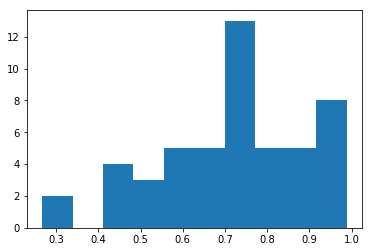

In [106]:
plt.hist(top_songs.energy)

These distributions match the distributions of all the songs available on Spotify (SHOW IMAGES HERE)



In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')